# Principal Component Analysis
**Written by Christian Alis**

## Dimensionality Reduction

A benefit of the techniques that we have discussed so far is that we are able to work with a very large number of dimensions simultaneously which is something that is not humanly possible. However, in general, we want to work with as few dimensions as possible. Let's look at one reason why is that so.


Consider a unit hypercube of dimensionality $d$ fully located in the nonnegative quadrant with one corner at the origin. We then take the $L_2$-norm distance of random points in the cube to the origin. We define contrast as the ratio of the variation of the distances to the mean distance. The plot of the contrast for different values of $d$ is shown below.

<img src="contrast.png" />

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_wine, fetch_20newsgroups, load_boston
from numpy.testing import assert_equal, assert_array_almost_equal

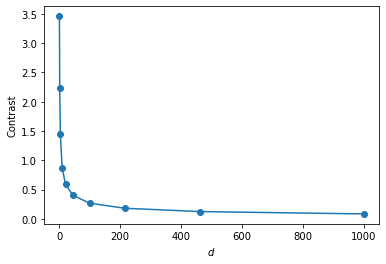

In [2]:
fig, ax = plt.subplots()
contrasts = []
ds = np.logspace(0, 3, 10).astype(int)
for d in ds:
    distances = [euclidean(np.zeros(d), np.random.random(d)) 
                 for _ in range(10000)]
    # (mu + 3*sigma) - (mu - 3*sigma)
    contrasts.append(6*np.std(distances) / np.mean(distances))
ax.plot(ds, contrasts, '-o')
ax.set_xlabel('$d$')
ax.set_ylabel('Contrast');

Higher dimensions make the contrast of $L_p$-norms smaller making it harder to distinguish different classes. For distributions that are naturally of lower dimension, the additional dimensions is an added complication that makes it more difficult to gain insights from the data.

**Problem 1**

Write down one more benefit or advantage of having fewer dimensions.

easier interpretability, can also reduce complexity of the model, can be easier or faster to run

In these set of exercises, we will explore three dimensionality reduction by matrix decomposition techniques. A benefit of these techniques is that the resulting dimensions are interpretable and their importance can be estimated. By using these techniques, we would be able to visualize higher-dimension datasets along the two or three most important dimensions.

## Dimensionality reduction by axis rotation

The figures in this section are screenshots from [Powell and Lehe](https://setosa.io/ev/principal-component-analysis/). You are encouraged to visit that webpage.

Consider the dataset consisting of five points shown below. The points are two-dimensional but visually, they look like a line i.e., one dimensional. If we rotate the axis such that the $x$-axis is the red axis and the $y$-axis is the green axis, we'll get the plot on the right below. The points look like a horizontal line now.

<img src="line-plots.png" style="width: 50em" />

If we compare the components along the red and green axes (below right) and the original $x$ and $y$ axes (below left), we can see that the range or spread or variance along the $x$-axis is similar to the variance along the $y$-axis. On the other hand, the variance along the green axis is very small, practically negligible, compared to the variance along the red axis. Knowing the coordinate of a point along the red axis would be more informative or useful than knowing the coordinate along the green axis since the coordinates along the latter are quite similar anyway. We can, therefore, discard the green axis and just work with the red axis without losing much information. That is, we reduce the number of dimensions by retaining only high-variance axes.

<img src="line-pcs.png" style="width: 50em" />

Let us now look at another dataset which is shown below. This time the points are arranged in a circular or star pattern. Rotating the axes to red and green doesn't really change much the pattern (upper right). Furthermore, the variance in the coordinates along the red and green axes (lower right) are almost the same. Thus, picking just one of the axes would result to a significant loss in information similar to what would happen if we just pick the $x$ or $y$ axis.

<img src="star-plots.png" style="width: 50em" />
<img src="star-pcs.png" style="width: 50em" />

The star pattern is inherently two-dimensional unlike a linear pattern which is inherently one-dimensional so it is not surprising that we can't just reduce it to a single dimension without a significant loss of information. However, if the star pattern is embedded in more than two dimensions, say we specify three dimensions for each point coordinate, we would be able to reduce the number of dimensions into just two by following the same process: rotating the coordinate system so that it coincides with the red and green axes then discarding the other axes. This is the general idea of dimensionality reduction by axis rotation.

The process for finding the red and green axes and reducing the dimensions by rotating the coordinate system to them is part of Principal Component Analysis (PCA). The red and green axes are known as the principal components. A dataset embedded in $N$ dimensions has $N$ principal components. The principal components are orthogonal to each other and, by convention, also orthonormalized. The set of principal components is the set of axes that maximizes the explained variance. Principal components are named from 1st to $N$th ordered from the axis with the most explained variance. In the examples, PC1 is the first principal component and corresponds to the axis with the most explained variance, PC2 is the second principal component with the second most explained variance, and so on. 

The Euclidean distance or $L_2$-norm is rotation and translation invariant hence its value won't change if we perform PCA on the data.

## Derivation

Consider the dataset shown below. We want to find the first principal component of the dataset. To do so, let us first pick a point $\vec x_{i,0}$. To make our life easier, we will mean-center the dataset so that the new coordinates of the point is $\vec x_i = \vec x_{i,0} - \vec{\bar x}$, where $\vec{\bar x}$ is the centroid of the dataset. 

<img src="pca-deriv.png" style="width: 30em" />

We now consider a unit vector $\hat w$ that passes through the origin. The projection of $\vec x_i$ on $\hat w$ is given by $(\vec x_i \cdot \hat w) \hat w$. The difference of $\vec x_i$ with its projection is known as the residual. The square of the residual is
$$
\begin{align}
\left\|\vec x_i - (\vec x_i \cdot \hat w) \hat w \right\|^2 
    &= 
    \left[\vec x_i - (\vec x_i \cdot \hat w) \hat w \right] \cdot 
    \left[\vec x_i - (\vec x_i \cdot \hat w) \hat w \right] \\
    &=
    \vec x_i \cdot \vec x_i 
    - 2(\vec x_i \cdot \hat w)(\vec x_i \cdot \hat w) 
    + (\vec x_i \cdot \hat w)^2 \hat w \cdot \hat w \\
    &=
    \left\|\vec x_i\right\|^2
    - 2(\vec x_i \cdot \hat w)^2
    + (\vec x_i \cdot \hat w)^2 \\
    &=
    \left\|\vec x_i\right\|^2
    - (\vec x_i \cdot \hat w)^2.
\end{align}
$$
We want to orient $\hat w$ such that it preserves as much information as possible. That is, we want to minimize the residual sum of squares (RSS),
$$
\begin{align}
\hat w &= \mathop{\mathrm{argmin}}_{\hat w'} RSS(\hat w') \\
    &= 
    \mathop{\mathrm{argmin}}_{\hat w'} 
    \sum_{i=1}^n \left[ \left\|\vec x_i\right\|^2 - (\vec x_i \cdot \hat w')^2 \right] \\
    &= 
    \mathop{\mathrm{argmax}}_{\hat w'} 
    \sum_{i=1}^n (\vec x_i \cdot \hat w')^2 \\
    &= 
    \mathop{\mathrm{argmax}}_{\hat w'} 
    \frac{1}{n} \sum_{i=1}^n (\vec x_i \cdot \hat w')^2 \\
    &= 
    \mathop{\mathrm{argmax}}_{\hat w'} 
    \left(\frac{1}{n} \sum_{i=1}^n \vec x_i \cdot \hat w'\right)^2 + Var[\vec x \cdot \hat w'] \\
    &= 
    \mathop{\mathrm{argmax}}_{\hat w'} Var[\vec x \cdot \hat w']
\end{align}
$$
The principal component maximizes the variance of the projection of the dataset on that axis. Let $\mathbf{X}$ be a matrix with rows corresponding to each point and columns corresponding to the components of that point in the mean-centered coordinate system, and $\mathbf{w'}$ be $\hat w'$ in vector form. We can then write,
$$
\begin{align}
\hat w &= \mathop{\mathrm{argmax}}_{\hat w'} 
    \frac{1}{n} \sum_{i=1}^n (\vec x_i \cdot \hat w')^2 \\
    &=
    \mathop{\mathrm{argmax}}_{\mathbf{w'}}
    \frac{1}{n} (\mathbf{Xw'})^T (\mathbf{Xw'}) \\
    &=
    \mathop{\mathrm{argmax}}_{\mathbf{w'}}
    \frac{1}{n} (\mathbf{w'^T X^T X w'}) \\
    &=
    \mathop{\mathrm{argmax}}_{\mathbf{w'}}
    \mathbf{w'}^T \frac{\mathbf{X}^T \mathbf{X}}{n} \mathbf{w'} \\
    &=
    \mathop{\mathrm{argmax}}_{\mathbf{w'}}
    \mathbf{w'}^T \mathbf{Vw'},
\end{align}
$$
where $V$ is the covariance matrix of the dataset in the mean-centered coordinate system. We can convert the problem of solving for $\hat w$ into an optimization problem: maximize $\mathbf{w'}^T \mathbf{Vw'}$ subject to the constraint $\mathbf{w'}^T\mathbf{w'}=1$. Using the method of Lagrange,
$$
\begin{align}
u &= \mathbf{w'}^T \mathbf{Vw'} - \lambda (\mathbf{w'}^T\mathbf{w'} - 1) \\
\frac{\partial u}{\partial \mathbf{w'}} &= 2\mathbf{Vw'} - 2\lambda\mathbf{w'} \\
0 &= 2\mathbf{Vw'} - 2\lambda\mathbf{w'} \\
\mathbf{Vw'} &= \lambda\mathbf{w'}.
\end{align}
$$
The principal components are therefore the eigenvectors of the covariance matrix. The explained variance of the $i$th PC is given by $\frac{\lambda_i}{\sum_i \lambda_i}$. If we decide to keep only $k$ principal components, the cumulative variance explained is simply $\frac{\sum_i^k \lambda_i}{\sum_i \lambda_i}$.

**Problem 2**

Create a function `pca` that accepts the design matrix and returns the rotated design matrix, the new coordinate system and the variance explained. Do not use scikit-learn.

In [73]:
def pca(X):
    #center the data
    scaled_X = (X - X.mean(axis=0))
    #get the covariance matrix
    covariance_matrix = np.cov(scaled_X, rowvar=False)

    # Get Eigen Vectors and Eigen Values
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

    # Get index sorting key based on Eigen Values
    sorted_key = np.argsort(eigen_values)[::-1]
    
    # Get num_components of Eigen Values and Eigen Vectors
    eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

    # Dot product of original data and eigen_vectors are the principal component values
    # This is the "projection" step of the original points on to the Principal Component
    principal_components=np.dot(scaled_X,eigen_vectors)

    w = eigen_vectors
    X_new = principal_components
    variance_explained = eigen_values/np.sum(eigen_values)
    return (X_new, w, variance_explained)

In [71]:
    #center the data
    X = 5 * np.random.RandomState(1337).random([100, 50]) - 2
    scaled_X = (X - X.mean(axis=0))
    #get the covariance matrix
    covariance_matrix = np.cov(scaled_X, rowvar=False)

    # Get Eigen Vectors and Eigen Values
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

    # Get index sorting key based on Eigen Values
    sorted_key = np.argsort(eigen_values)[::-1]
    
    # Get num_components of Eigen Values and Eigen Vectors
    eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

    # Dot product of original data and eigen_vectors are the principal component values
    # This is the "projection" step of the original points on to the Principal Component
    principal_components=np.dot(scaled_X,eigen_vectors)

    w = eigen_vectors
    X_new = principal_components
    variance_explained = eigen_values/np.sum(eigen_values)
    (X_new, w, variance_explained)

(array([[ 0.02468545, -1.47709396, -0.80158847, ...,  0.35511145,
         -1.10605152,  0.64907094],
        [-2.39567346, -1.80390224, -0.25078673, ...,  0.91330604,
         -0.63428498, -0.39663796],
        [ 4.42828144, -2.37393436, -0.2826466 , ..., -0.35360286,
         -0.19470309, -0.27003739],
        ...,
        [-3.07344324,  0.75602588,  3.30390712, ..., -0.58388232,
          0.26950369,  0.7527958 ],
        [ 1.1297456 , -0.40040931, -3.25577455, ..., -0.54215703,
          0.90209738, -0.19093161],
        [ 2.54474154,  0.02109206, -3.35354058, ...,  0.64211977,
          0.36023195, -0.27011661]]),
 array([[ 0.10984443, -0.04466866,  0.07609874, ..., -0.03393016,
         -0.13415692, -0.03920861],
        [-0.28396031, -0.00477609, -0.03622612, ...,  0.08081226,
         -0.09031394, -0.07773882],
        [ 0.05705867,  0.27807525,  0.05816591, ..., -0.10776023,
         -0.07039395, -0.11090248],
        ...,
        [-0.06105265,  0.16056326,  0.25785328, ...,  

In [70]:
variance_explained[:10]

array([0.        , 0.0095668 , 0.0191336 , 0.02870041, 0.03826721,
       0.04783401, 0.05740081, 0.06696762, 0.07653442, 0.08610122])

In [74]:
X = 5 * np.random.RandomState(1337).random([100, 50]) - 2
X_new, w, variance_explained = pca(X)
assert_equal(X_new.shape, (100, 50))
assert_equal(w.shape, (50, 50))
assert_equal(variance_explained.shape, (50,))
assert_array_almost_equal(
    np.abs(X_new[0,:10]),
    [0.02468545, 1.47709396, 0.80158847, 1.46281537, 3.15858308,
     0.6204976 , 0.34812499, 1.11621307, 1.00099442, 0.14032812]
)
assert_array_almost_equal(
    np.abs(X_new[0,-10:]),
    [0.22097258, 0.41180542, 0.45345479, 0.04780374, 1.39858904,
     0.4074328 , 0.1689932 , 0.35511145, 1.10605152, 0.64907094]
)
assert_array_almost_equal(
    np.abs(w[0,:10]),
    [0.10984443, 0.04466866,  0.07609874, 0.20949   , 0.16766863,
     0.16917997, 0.12601683,  0.01216497, 0.0848295 , 0.27422712]
)
assert_array_almost_equal(
    np.abs(w[0,-10:]),
    [0.03102559,  0.31369297, 0.25129197,  0.25058488, 0.13686937,
     0.1097446 ,  0.02934478, 0.03393016,  0.13415692, 0.03920861]
)
assert_array_almost_equal(
    variance_explained[:10],
    [0.05514495, 0.05093447, 0.04686112, 0.04541824, 0.0417751 ,
     0.04042561, 0.03748936, 0.03665323, 0.03535593, 0.03329312]
)

## PCA on the Boston House Prices dataset

For this section, we will work with the [Boston House Prices](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset) dataset.

In [75]:
bhp = load_boston()
print(bhp.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We remove the indicator variable and standardize the features.

In [76]:
X = np.hstack((bhp.data[:,:3], bhp.data[:,4:]))
X = (X - X.mean(axis=0)) / X.std(axis=0)

Let us rotate the axes and plot them along the first two principal components.

In [77]:
X_new, w, variance_explained = pca(X)

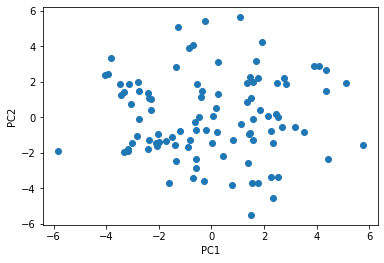

In [54]:
plt.scatter(X_new[:,0], X_new[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2');

We plot the variance explained by each principal component below. This is known as a scree plot.

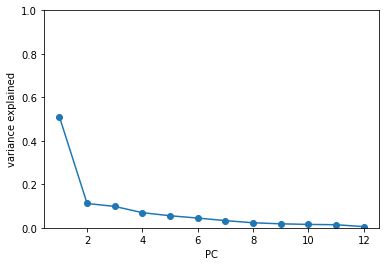

In [78]:
plt.plot(range(1, len(variance_explained)+1), variance_explained, 'o-')
plt.ylim(0,1)
plt.xlabel('PC')
plt.ylabel('variance explained');

The first principal component already explains 51% of the observed variance. We perform dimensionality reduction by selecting $q < p$ principal components from the original $p$ dimensions. In practice, we look at the total variance explained by the $q$ principal components and select the value of $q$ based on the desired total variance explained.

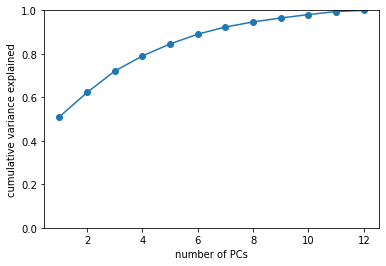

In [79]:
plt.plot(range(1, len(variance_explained)+1), 
         variance_explained.cumsum(), 'o-')
plt.ylim(0,1)
plt.xlabel('number of PCs')
plt.ylabel('cumulative variance explained');

Let us arbitrarily set a total variance explained threshold of 90%. This corresponds to seven PCs. To project the standardized values to 7 dimensions, we truncate $\mathbf{w}$ to retain only the first 7 columns (eigenvectors) then (right) multiply it to $\mathbf{X}$. Another approach is to just retain the first 7 columns of `X_new`.

To ease interpretation, let us plot the original coordinates into the new PCs.

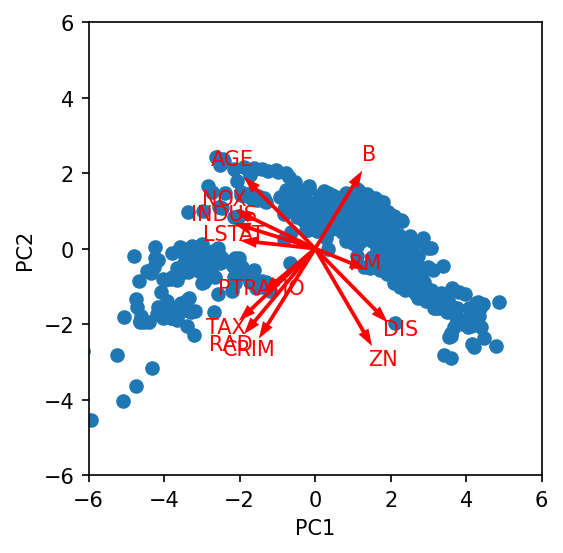

In [80]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(aspect='equal'), dpi=150)
ax.scatter(X_new[:,0], X_new[:,1])
features = np.concatenate((bhp.feature_names[:3], bhp.feature_names[4:]))
for feature, vec in zip(features, w):
    ax.arrow(0, 0, 5*vec[0], 5*vec[1], width=0.1, ec='none', fc='r')
    ax.text(7*vec[0], 7*vec[1], feature, ha='center', color='r')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

A benefit of PCA is that its results are interpretable. Here are some of the things you can look at when interpreting the resulting scatter plot.

* **Coordinates**: What do the directions of each PC mean? Use the general direction of the transformed dimensions as a guide.
* **Correlations**: Which groups of transformed dimensions point toward the same direction? Which are opposite to each other? These suggest correlation or anticorrelation.
* **Clusters**: Which points clump together?
* **Funnels**: Are there points that are wide on one side and narrow on the other? This suggest dependence of principal components.
* **Voids**: Are there unusually unpopulated areas? This suggests certain combinations of values are unlikely to occur.

**Problem 3**

Interpret the plot above.

YOUR ANSWER HERE

**Problem 4 [3 pts]**

Perform PCA on the wines dataset. Make sure to include the number of PCs to be retained and its justification, as well as interpretation.

## References
* C. Shalizi, Statistics 36-350 lecture notes, http://www.stat.cmu.edu/~cshalizi/350/lectures/10/lecture-10.pdf
* C. Aggarwal, Data Mining: The Textbook, Chapter 2.